In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import glob
import os

In [36]:
def plotHistory(historyName):
    history = pickle.load(open("histories/" + historyName, "rb"))
    
    numInvalidActions = np.array(history['num_invalid_actions'])
    numCoinsCollected = np.array(history['num_coins_collected'])
    roundLength = np.array(history['round_length'])
    numEpisodes = len(numInvalidActions)
    
    fig = plt.figure(figsize=(20,5))

    plt.subplot(1, 3, 1)
    plt.plot(np.arange(numEpisodes), numInvalidActions, label="#invalid", color="red")
    plt.hlines(np.min(numInvalidActions), 0, numEpisodes, colors='green', linestyles='dashed', label=f"min @{np.min(numInvalidActions)}",)
    plt.legend(loc=1)

    plt.subplot(1, 3, 2)
    plt.plot(np.arange(numEpisodes), numCoinsCollected, label="#coins", color="gold")
    plt.hlines(np.max(numCoinsCollected), 0, numEpisodes, colors='red', linestyles='dashed', label=f"max @{np.max(numCoinsCollected)}",)
    plt.legend(loc=4)
    
    plt.subplot(1, 3, 3)
    plt.plot(np.arange(numEpisodes), roundLength, label="#steps", color="green")
    plt.hlines(np.min(roundLength), 0, numEpisodes, colors='green', linestyles='dashed', label=f"min @{np.min(roundLength)}",)
    plt.legend(loc=4)

    plt.show()

In [39]:
def plotAverageHistory(folderName):
    histories = [pickle.load(open(historyPath, "rb")) for historyPath in glob.glob(f'{folderName}/*.pt')]
    
    numInvalidActions = np.stack([np.array(history['num_invalid_actions']) for history in histories])
    numCoinsCollected = np.stack([np.array(history['num_coins_collected']) for history in histories])
    roundLength = np.stack([np.array(history['round_length']) for history in histories])
    numEpisodes = len(numInvalidActions[0,:])
    
    print(f"Create plot using {numInvalidActions.shape[0]} histories.")
    
    fig = plt.figure(figsize=(20,5))
    
    stdNumInvalidActions = np.std(numInvalidActions, axis=0)
    meanNumInvalidActions = np.mean(numInvalidActions, axis=0)
    
    plt.subplot(1, 3, 1)
    plt.plot(np.arange(numEpisodes), meanNumInvalidActions + stdNumInvalidActions, color="red", alpha = 0.1)
    plt.plot(np.arange(numEpisodes), meanNumInvalidActions, label="#invalid", color="red")
    plt.plot(np.arange(numEpisodes), meanNumInvalidActions - stdNumInvalidActions, color="red", alpha = 0.1)
    plt.legend(loc=1)
    
    stdNumCoinsCollected = np.std(numCoinsCollected, axis=0)
    meanNumCoinsCollected = np.mean(numCoinsCollected, axis=0)

    plt.subplot(1, 3, 2)
    plt.plot(np.arange(numEpisodes), meanNumCoinsCollected + stdNumCoinsCollected, color = "gold", alpha = 0.3)
    plt.plot(np.arange(numEpisodes), meanNumCoinsCollected, label="#coins", color="gold")
    plt.plot(np.arange(numEpisodes), meanNumCoinsCollected - stdNumCoinsCollected, color = "gold", alpha = 0.3)
    plt.hlines(np.max(meanNumCoinsCollected), 0, numEpisodes, colors='green', linestyles='dashed', label=f"max @{np.round(np.max(meanNumCoinsCollected))}")
    plt.legend(loc=4)
    
    stdRoundLength = np.std(roundLength, axis=0)
    meanRoundLength = np.mean(roundLength, axis=0)
    
    plt.subplot(1, 3, 3)
    plt.plot(np.arange(numEpisodes), meanRoundLength + stdRoundLength, color = "green", alpha = 0.3)
    plt.plot(np.arange(numEpisodes), meanRoundLength, label="#steps", color="green")
    plt.plot(np.arange(numEpisodes), meanRoundLength - stdRoundLength, color = "green", alpha = 0.3)
    plt.hlines(np.min(meanRoundLength), 0, numEpisodes, colors='green', linestyles='dashed', label=f"min @{np.round(np.min(meanRoundLength))}")
    plt.legend(loc=4)

    plt.show()

In [ ]:
def plotLatestHistory():
    list_of_histories = glob.glob('histories/*.pt')
    latest_history_name = max(list_of_histories, key=os.path.getctime)
    plotHistory(os.path.basename(latest_history_name))

#### Unoptimized training

In [ ]:
plotAverageHistory("histories/linear_agent_4_look_around_without_mirroring")

#### Training when exploiting 2 spatial symmetries

In [ ]:
plotAverageHistory("histories/linear_agent_4_look_around_with_mirroring")

#### Training when exploiting 2 spatial symmetries and unique coin identification

In [ ]:
plotAverageHistory("histories/linear_agent_4_look_around_with_mirroring_unique_coin_identifiers")

#### Training when exploiting 3 spatial symmetries and unique coin identification

In [ ]:
plotAverageHistory("histories/linear_agent_4_look_around_with_extensive_mirroring_unique_coin_identifiers")

#### Training when exploiting 2 spatial symmetries and unique coin identification (more data, shorter interval)

In [ ]:
plotAverageHistory("histories/linear_agent_4_look_around_with_mirroring_unique_coin_identifiers_75")

#### Training when exploiting 3 spatial symmetries and unique coin identification (more data, shorter interval)

In [ ]:
plotAverageHistory("histories/linear_agent_4_look_around_with_extensive_mirroring_unique_coin_identifiers_75")

From now on, we well restrict ourselves to the case where we exploit 3 spatial symmetries and use unique coin identification. We will vary the look around horizon in the next simulation study. 

## Varying Look around

#### 3 blocks look around

In [ ]:
plotAverageHistory("histories/linear_agent_3_look_around")

#### 4 blocks look around (from last testing session)

In [ ]:
plotAverageHistory("histories/linear_agent_4_look_around_with_extensive_mirroring_unique_coin_identifiers")

#### 5 blocks look around

In [ ]:
plotAverageHistory("histories/linear_agent_5_look_around")

#### 15 blocks look around (full look around)

In [ ]:
plotAverageHistory("histories/linear_agent_15_look_around")

## Varying the discount factor

#### Discount factor: 0.995

In [ ]:
plotAverageHistory("histories/linear_agent_4_look_around_with_extensive_mirroring_unique_coin_identifiers")

#### Discount factor: 0.95

In [ ]:
plotAverageHistory("histories/linear_agent_4_look_around_disc=0.96")

#### Discount factor: 0.8

In [ ]:
plotAverageHistory("histories/linear_agent_4_look_around_disc=0.8")

#### Discount factor: 0.7

In [ ]:
plotAverageHistory("histories/linear_agent_4_look_around_disc=0.7")

In [ ]:
plotHistory("linear_agent_tpl/23_03_2021_18_15_48_807382.pt")

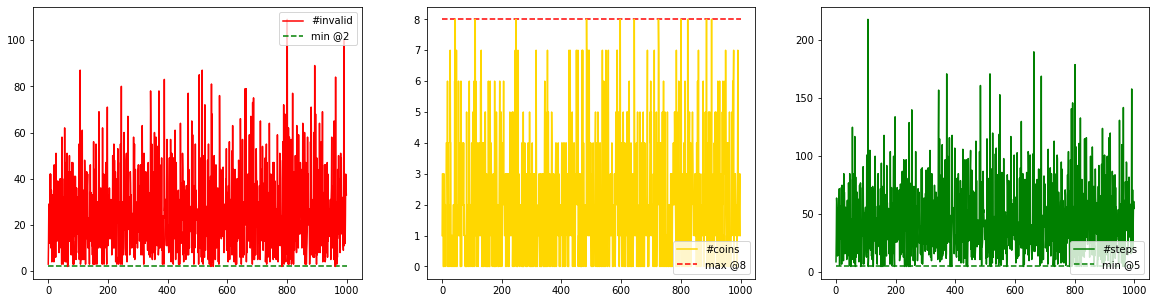

In [8]:
plotHistory("linear_agent_tpl/24_03_2021_11_46_27_816456.pt")

Create plot using 10 histories.


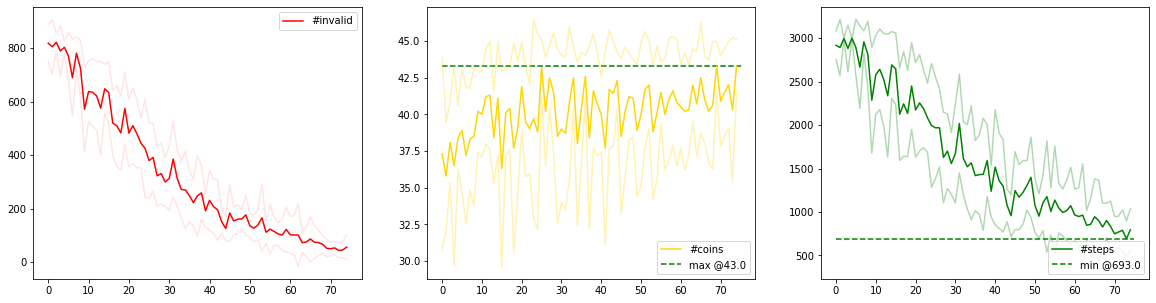

In [40]:
plotAverageHistory("histories/N-STEP-SARSA-N=1-LEARNING-RATE=0.000050")

Create plot using 10 histories.


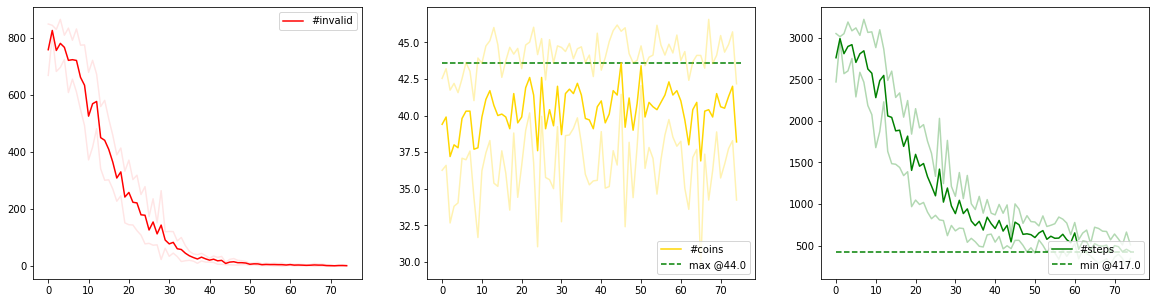

In [47]:
plotAverageHistory("histories/N-STEP-SARSA-N=3-LEARNING-RATE=0.000050")

Create plot using 10 histories.


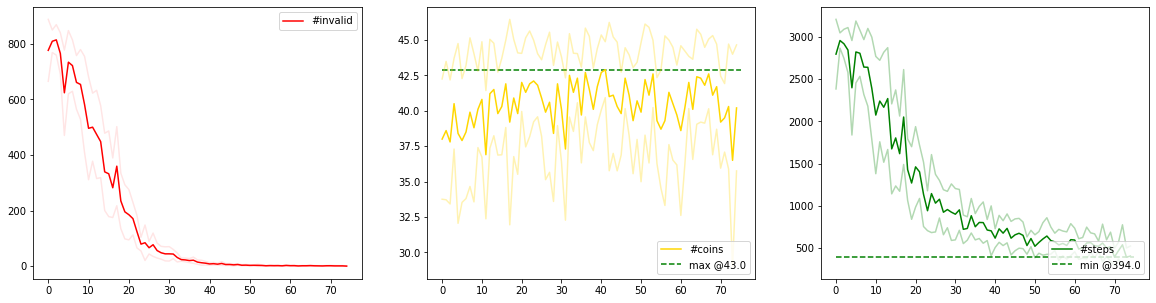

In [49]:
plotAverageHistory("histories/N-STEP-SARSA-N=5-LEARNING-RATE=0.000050")

Create plot using 10 histories.


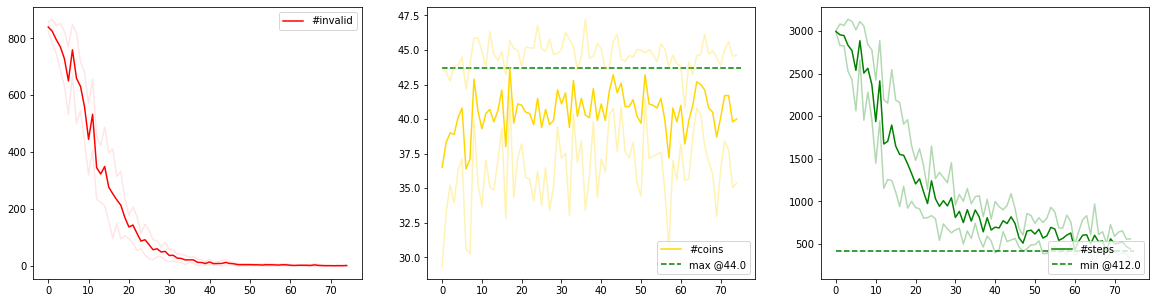

In [58]:
plotAverageHistory("histories/N-STEP-SARSA-N=7-LEARNING-RATE=0.000050")

Create plot using 10 histories.


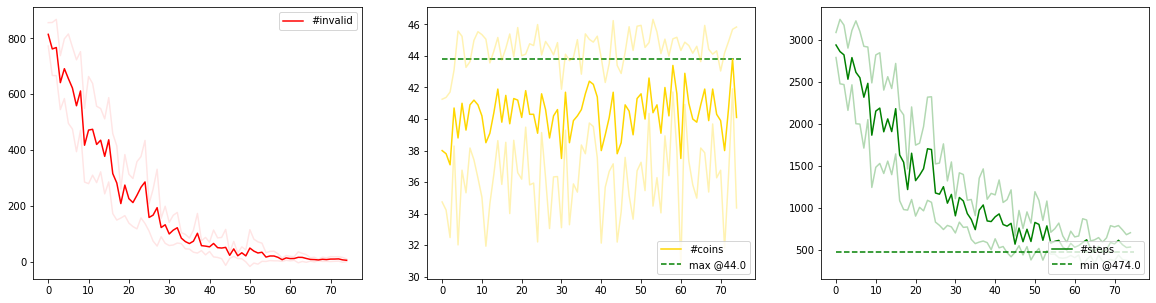

In [65]:
plotAverageHistory("histories/N-STEP-SARSA-N=1-LEARNING-RATE=0.000100")

Create plot using 10 histories.


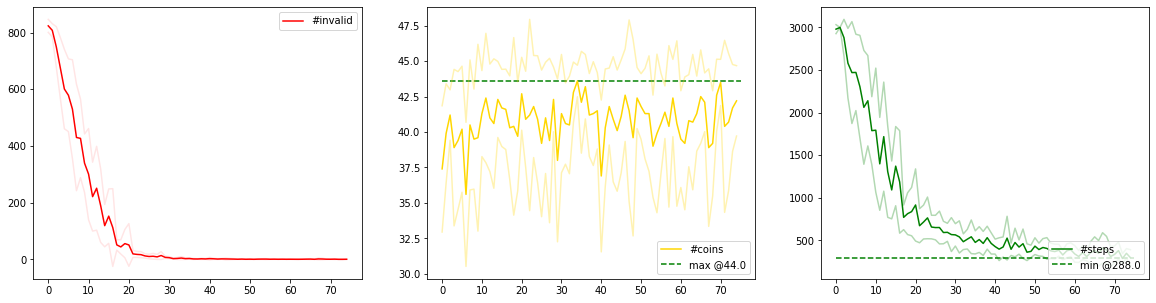

In [96]:
plotAverageHistory("histories/N-STEP-SARSA-N=3-LEARNING-RATE=0.000100")

Create plot using 10 histories.


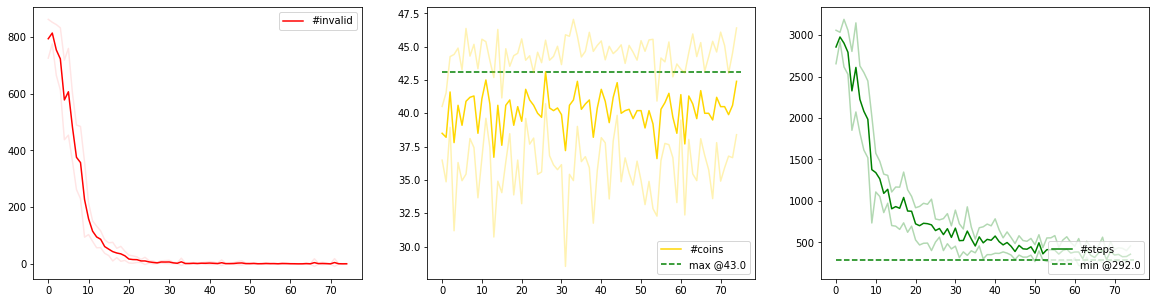

In [102]:
plotAverageHistory("histories/N-STEP-SARSA-N=5-LEARNING-RATE=0.000100")

Create plot using 10 histories.


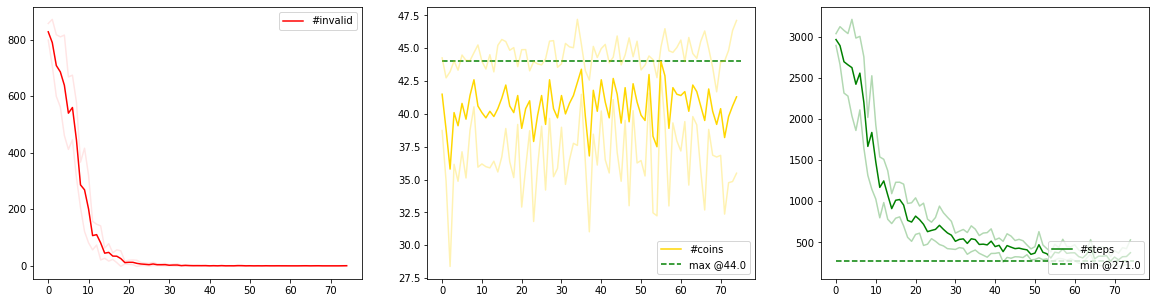

In [103]:
plotAverageHistory("histories/N-STEP-SARSA-N=7-LEARNING-RATE=0.000100")

Create plot using 10 histories.


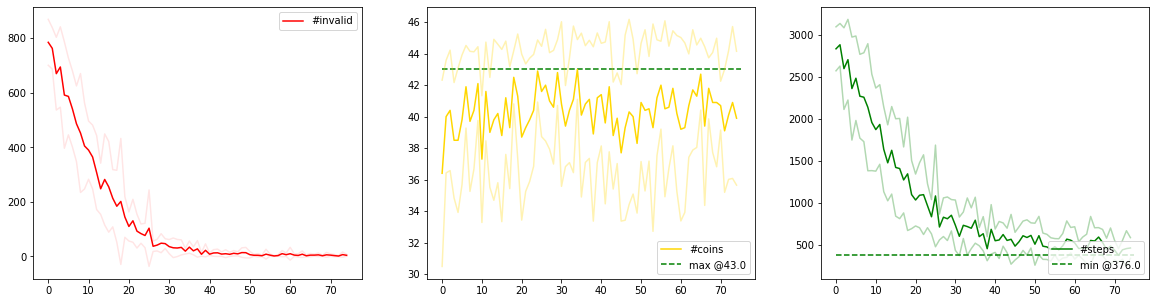

In [104]:
plotAverageHistory("histories/N-STEP-SARSA-N=1-LEARNING-RATE=0.000150")

Create plot using 10 histories.


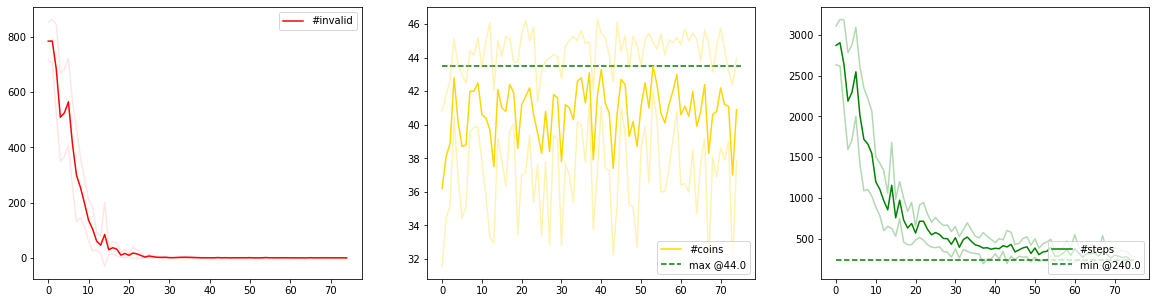

In [105]:
plotAverageHistory("histories/N-STEP-SARSA-N=3-LEARNING-RATE=0.000150")

Create plot using 10 histories.


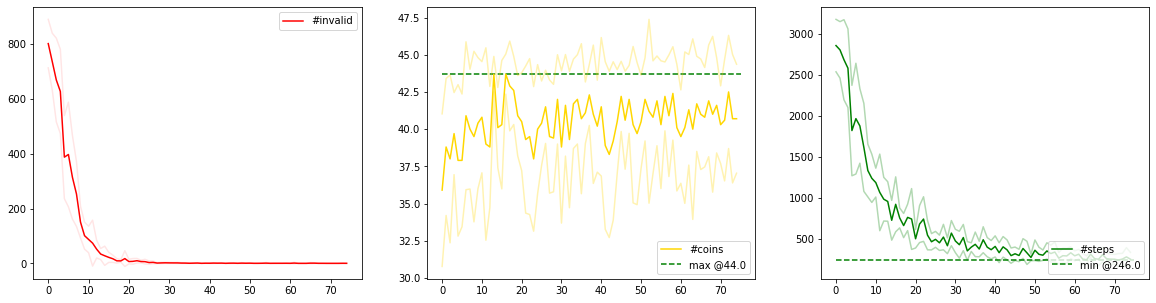

In [106]:
plotAverageHistory("histories/N-STEP-SARSA-N=5-LEARNING-RATE=0.000150")

Create plot using 10 histories.


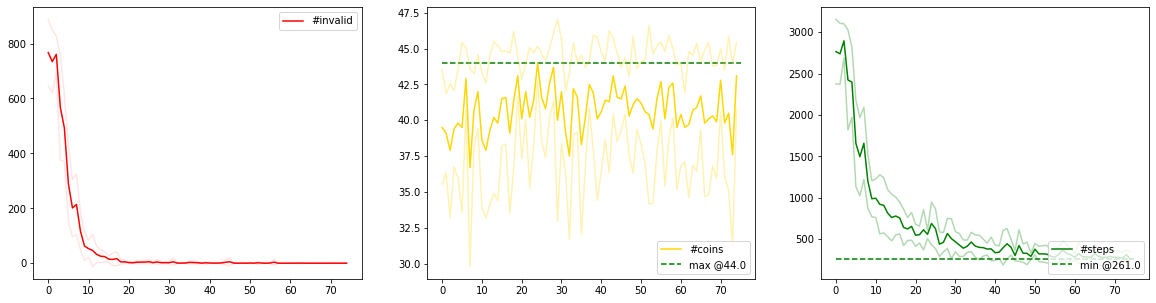

In [107]:
plotAverageHistory("histories/N-STEP-SARSA-N=7-LEARNING-RATE=0.000150")

Create plot using 10 histories.


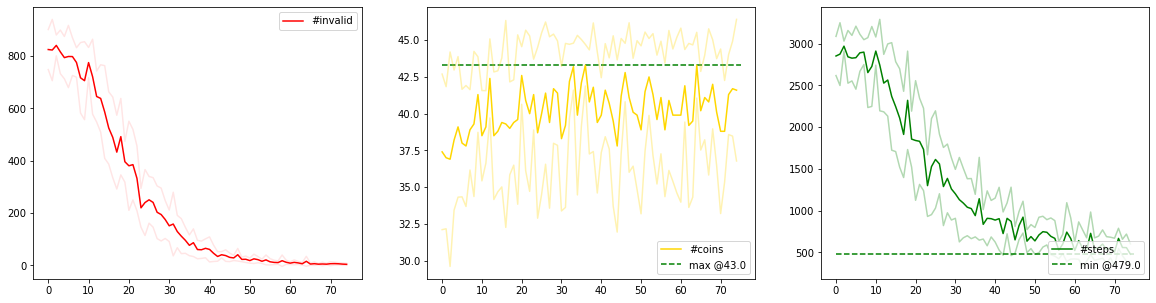

In [108]:
plotAverageHistory("histories/SARSA(LAMBDA)-TRACE-DECAY=0.75-LEARNING-RATE=0.000050")

Create plot using 10 histories.


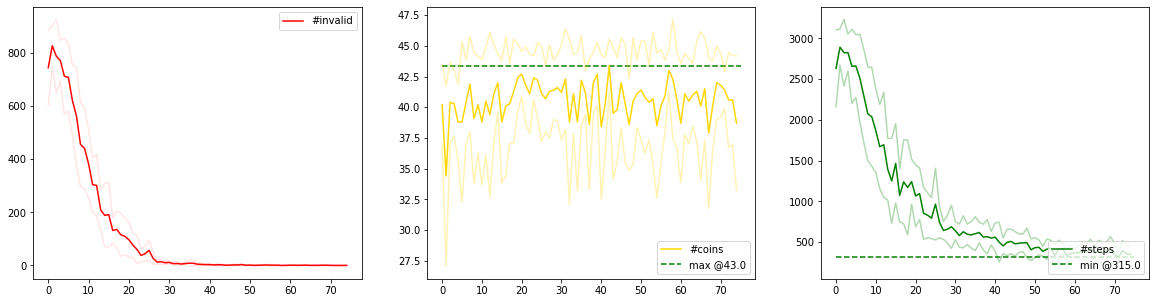

In [110]:
plotAverageHistory("histories/SARSA(LAMBDA)-TRACE-DECAY=0.75-LEARNING-RATE=0.000100")

Create plot using 10 histories.


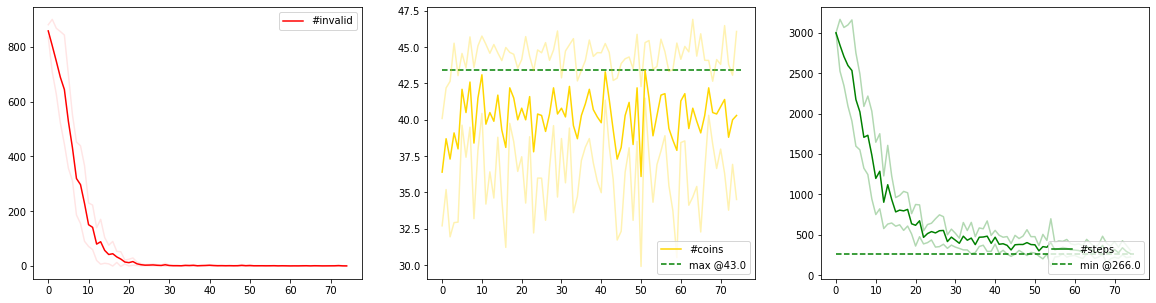

In [111]:
plotAverageHistory("histories/SARSA(LAMBDA)-TRACE-DECAY=0.75-LEARNING-RATE=0.000150")

Create plot using 10 histories.


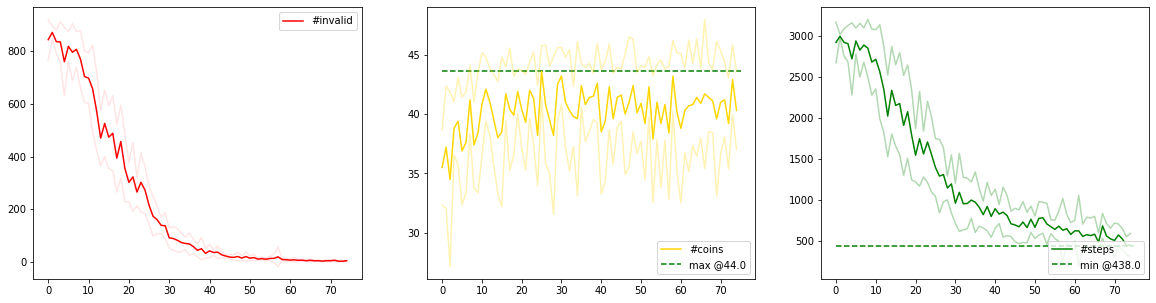

In [113]:
plotAverageHistory("histories/SARSA(LAMBDA)-TRACE-DECAY=0.85-LEARNING-RATE=0.000050")

Create plot using 10 histories.


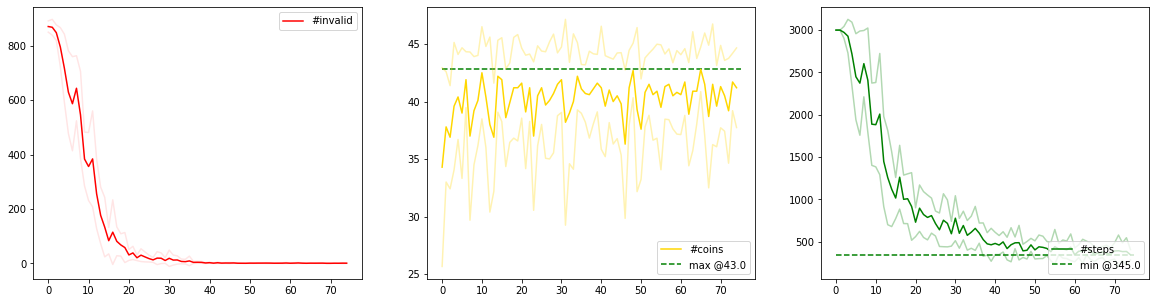

In [114]:
plotAverageHistory("histories/SARSA(LAMBDA)-TRACE-DECAY=0.85-LEARNING-RATE=0.000100")

Create plot using 10 histories.


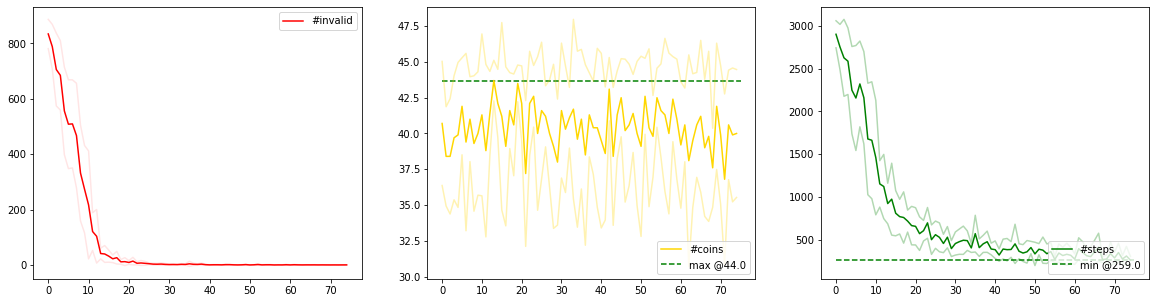

In [115]:
plotAverageHistory("histories/SARSA(LAMBDA)-TRACE-DECAY=0.85-LEARNING-RATE=0.000150")

Create plot using 10 histories.


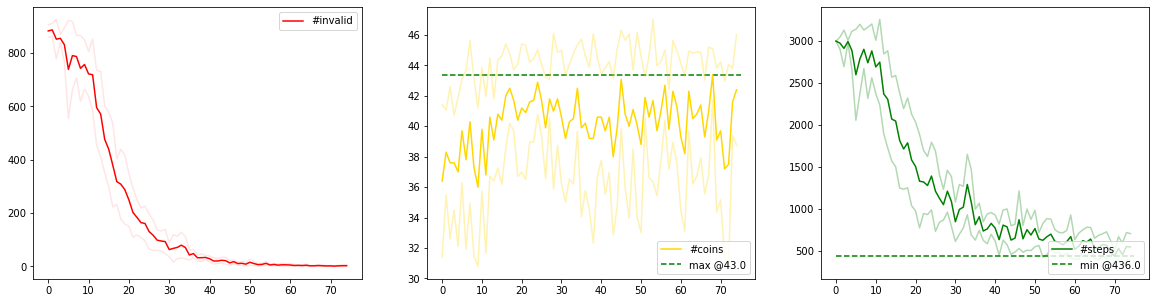

In [116]:
plotAverageHistory("histories/SARSA(LAMBDA)-TRACE-DECAY=0.95-LEARNING-RATE=0.000050")

Create plot using 10 histories.


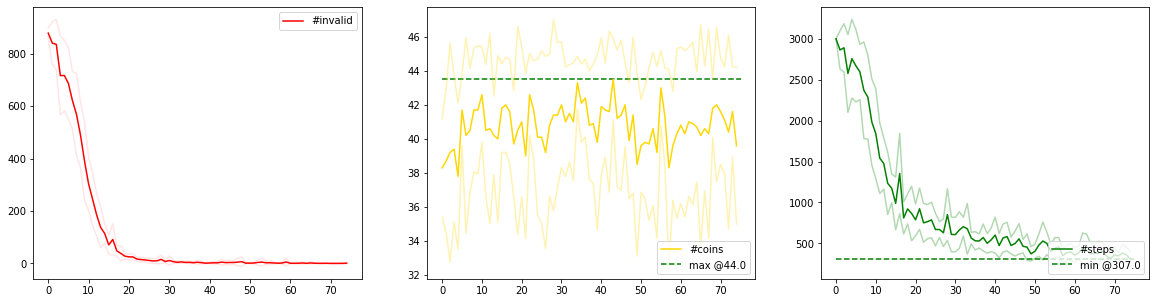

In [117]:
plotAverageHistory("histories/SARSA(LAMBDA)-TRACE-DECAY=0.95-LEARNING-RATE=0.000100")

Create plot using 10 histories.


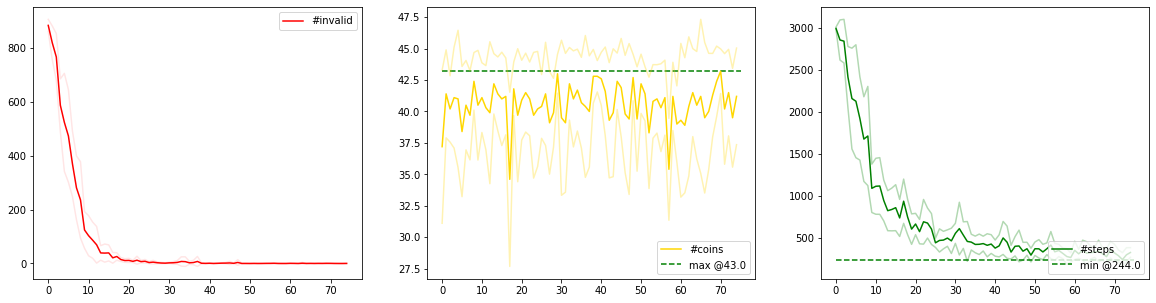

In [118]:
plotAverageHistory("histories/SARSA(LAMBDA)-TRACE-DECAY=0.95-LEARNING-RATE=0.000150")

Create plot using 10 histories.


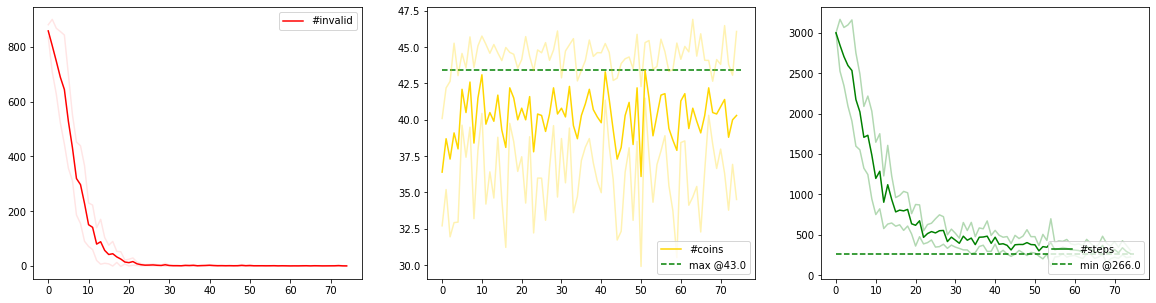

In [128]:
plotAverageHistory("histories/SARSA(LAMBDA)-TRACE-DECAY=0.75-LEARNING-RATE=0.000150")

Create plot using 10 histories.


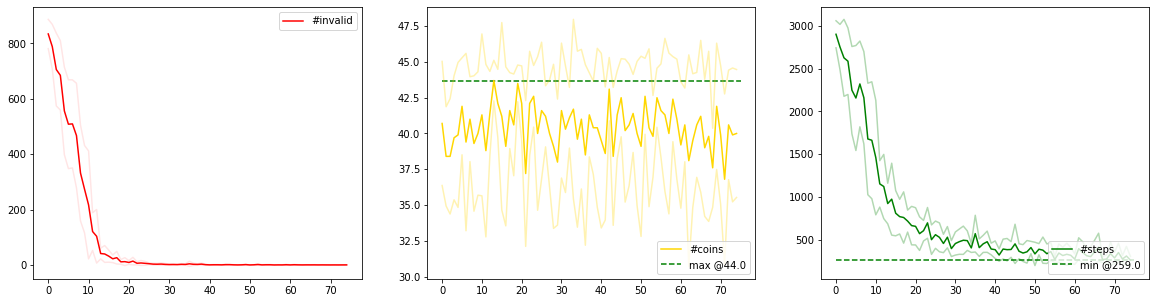

In [129]:
plotAverageHistory("histories/SARSA(LAMBDA)-TRACE-DECAY=0.85-LEARNING-RATE=0.000150")

Create plot using 10 histories.


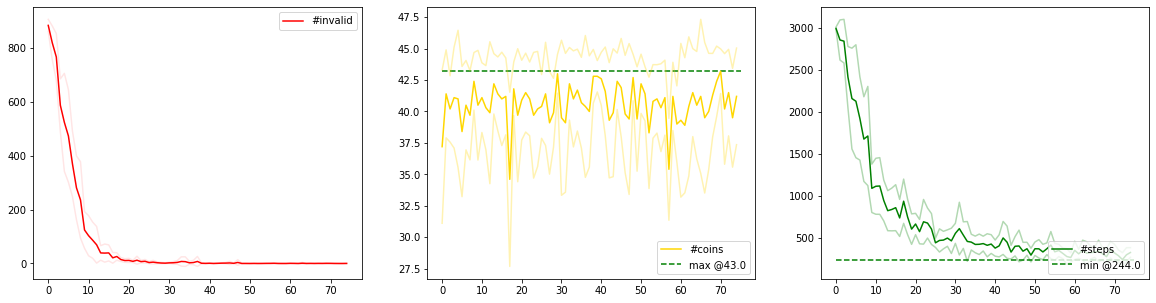

In [130]:
plotAverageHistory("histories/SARSA(LAMBDA)-TRACE-DECAY=0.95-LEARNING-RATE=0.000150")

Create plot using 10 histories.


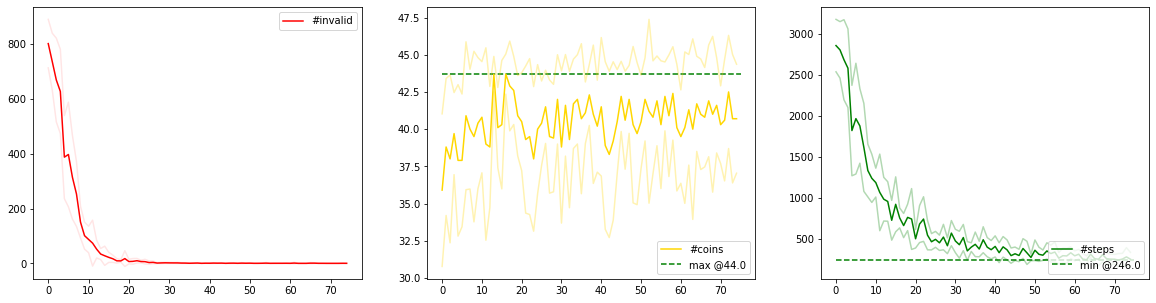

In [131]:
plotAverageHistory("histories/N-STEP-SARSA-N=5-LEARNING-RATE=0.000150")

Create plot using 10 histories.


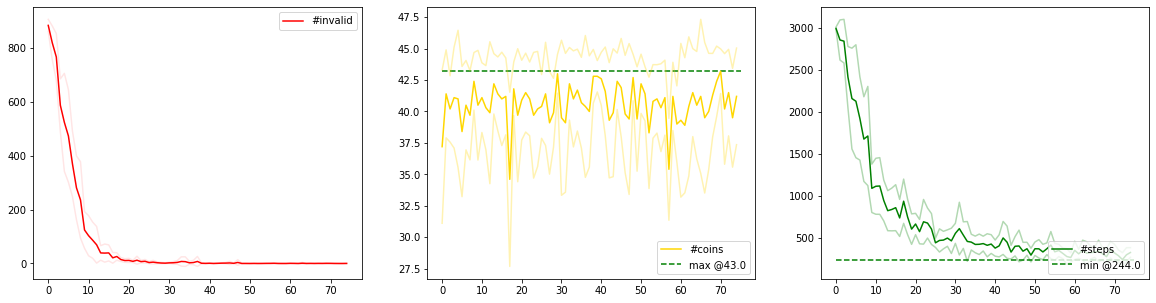

In [132]:
plotAverageHistory("histories/SARSA(LAMBDA)-TRACE-DECAY=0.95-LEARNING-RATE=0.000150")

In [133]:
str(None)

'None'